<a href="https://colab.research.google.com/github/takaito1/EAS4821_S2024/blob/main/scripts/major_axis_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Major axis regression
- calculate the covariance matrix of the data
- calculate eigenvectors
- calculate the slope of eigenvector corresponding to the largest eigenvalue
- calculate the intercept such that the regression line passes through the mean X and mean Y

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
dfx = pd.read_csv('/content/drive/MyDrive/EAS2655_4821/atlanta.csv',index_col=0,na_values=-999)
dfy = pd.read_csv('/content/drive/MyDrive/EAS2655_4821/boston.csv',index_col=0,na_values=-999)

In [3]:
# get data from 1880 to 2023
atl = dfx['JAN'].loc[1880:2023]
bos = dfy['JAN'].loc[1880:2023]

In [4]:
# calculate covariance matrix
c = np.cov(atl,bos)
print(c)

[[21.89389083 12.43346154]
 [12.43346154 19.1679021 ]]


In [5]:
# calculate the eigenvalue
d,V=np.linalg.eig(c)
print(d,V)

[33.03884272  8.02295021] [[ 0.74463759 -0.667469  ]
 [ 0.667469    0.74463759]]


In [6]:
# calculate the slope and intercept for model1 regression
a1 = c[0,1]/c[0,0]
b1 = np.mean(bos)-a1*np.mean(atl)

In [7]:
# calculate the slope and intercept for model2 regression
a2 = V[1,0]/V[0,0]
b2 = np.mean(bos)-a2*np.mean(atl)

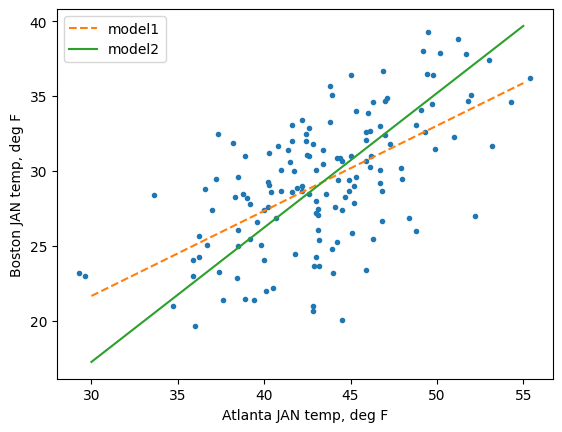

In [8]:
plt.plot(atl,bos,'.')
#
x=np.linspace(30,55,10)
y1=a1*x+b1
plt.plot(x,y1,'--',label = 'model1')
y2=a2*x+b2
plt.plot(x,y2,'-',label = 'model2')
plt.legend()
plt.xlabel('Atlanta JAN temp, deg F')
plt.ylabel('Boston JAN temp, deg F')
plt.show()